In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE_cleaned.csv')

In [19]:
df['Classes'].value_counts() 

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [20]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [21]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(['FWI','day','month','year'], axis=1) 
y = df['FWI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [24]:
def correlaion(data,threshold):
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlaion(X_train, 0.8)

In [27]:
X_train.drop(corr_features, axis=1, inplace=True)

In [28]:
X_test.drop(corr_features, axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.1
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [31]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [32]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}, MAE: {mae_lasso}')


Lasso Regression - MSE: 0.8970474045515048, R2: 0.9704027012816706, MAE: 0.6776158719774497


<Axes: xlabel='FWI'>

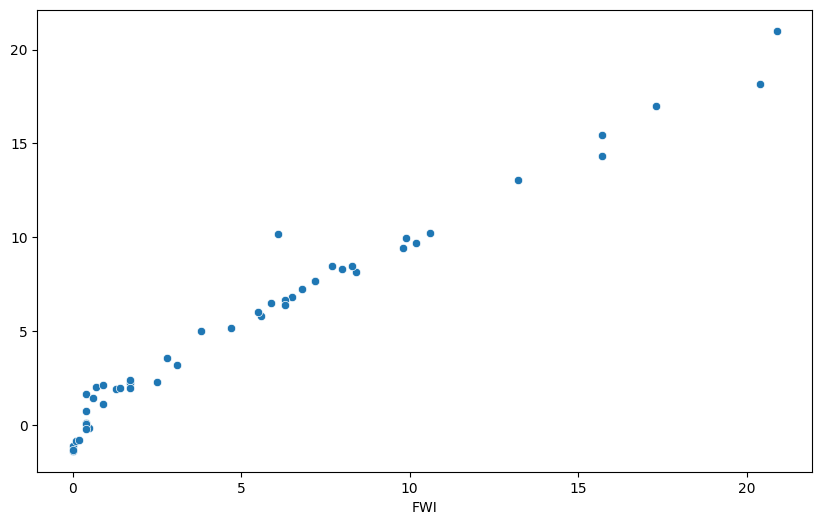

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso)

LassoCV Regression - MSE: 0.667594541680381, R2: 0.9779732988774219, MAE: 0.5619043833707776


<Axes: xlabel='FWI'>

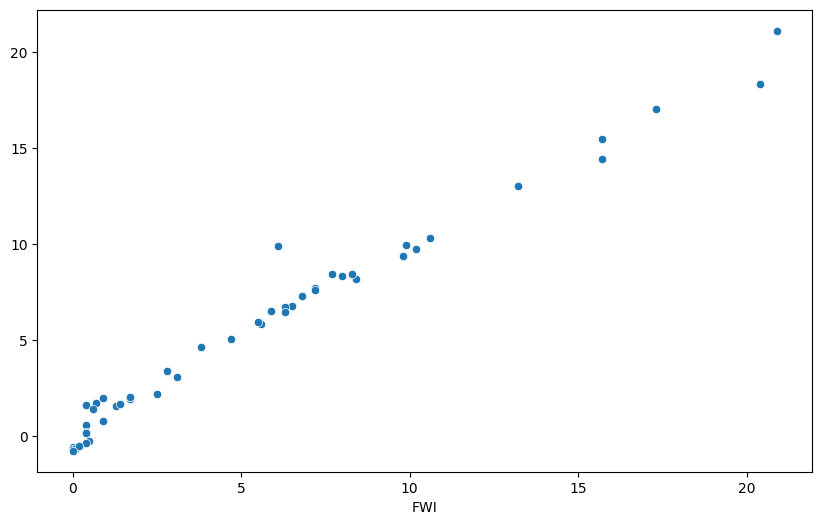

In [34]:
from sklearn.linear_model import  LassoCV
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso_cv = lasso_cv.predict(X_test_scaled)
mse_lasso_cv = mean_squared_error(y_test, y_pred_lasso_cv)
r2_lasso_cv = r2_score(y_test, y_pred_lasso_cv)
mae_lasso_cv = mean_absolute_error(y_test, y_pred_lasso_cv)
print(f'LassoCV Regression - MSE: {mse_lasso_cv}, R2: {r2_lasso_cv}, MAE: {mae_lasso_cv}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso_cv)

In [35]:
import pickle
pickle.dump(lasso_cv, open('lasso_cv_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler_algerian_forest.pkl', 'wb'))

RidgeCV Regression - MSE: 0.8419867979327489, R2: 0.9722193780965626, MAE: 0.6869262008277132


<Axes: xlabel='FWI'>

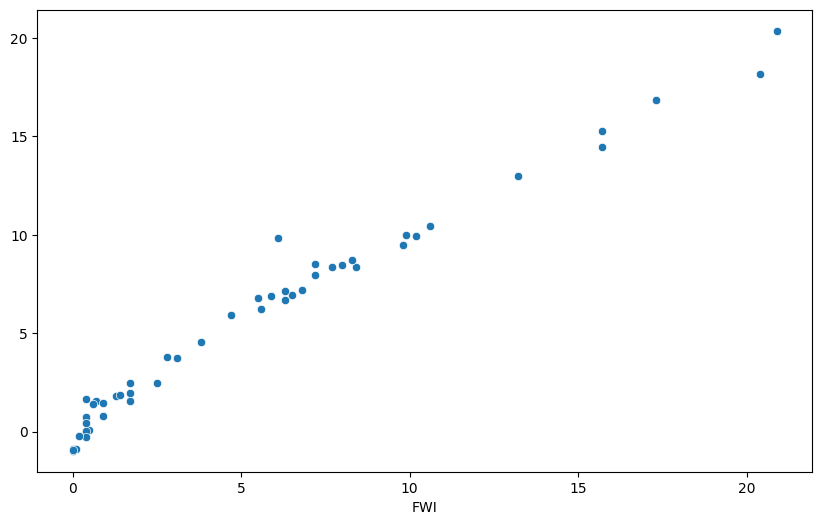

In [36]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge_cv = ridge_cv.predict(X_test_scaled)
mse_ridge_cv = mean_squared_error(y_test, y_pred_ridge_cv)
r2_ridge_cv = r2_score(y_test, y_pred_ridge_cv)
mae_ridge_cv = mean_absolute_error(y_test, y_pred_ridge_cv)
print(f'RidgeCV Regression - MSE: {mse_ridge_cv}, R2: {r2_ridge_cv}, MAE: {mae_ridge_cv}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge_cv)

In [37]:
pickle.dump(ridge_cv, open('ridge_cv_model.pkl', 'wb'))

ElasticNetCV Regression - MSE: 0.6637102658943735, R2: 0.9781014571778188, MAE: 0.5710147088777218


<Axes: xlabel='FWI'>

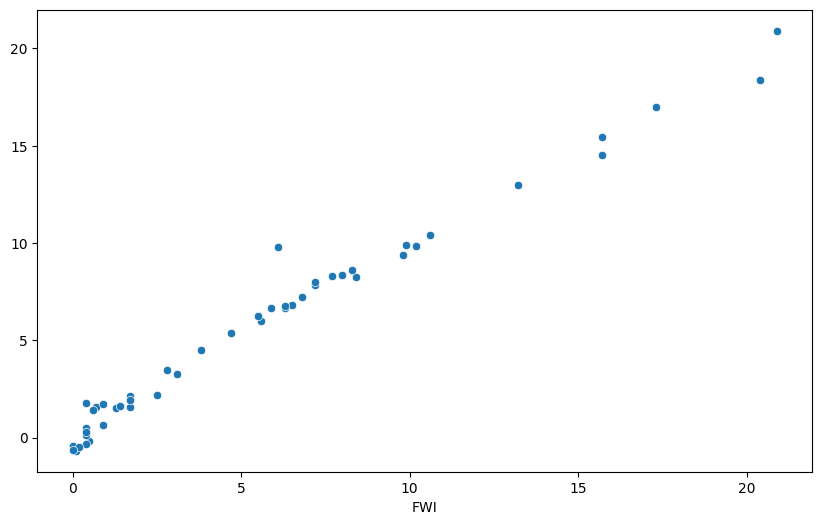

In [38]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)
elastic_net_cv.fit(X_train_scaled, y_train)
y_pred_elastic_net_cv = elastic_net_cv.predict(X_test_scaled)
mse_elastic_net_cv = mean_squared_error(y_test, y_pred_elastic_net_cv)
r2_elastic_net_cv = r2_score(y_test, y_pred_elastic_net_cv)
mae_elastic_net_cv = mean_absolute_error(y_test, y_pred_elastic_net_cv)
print(f'ElasticNetCV Regression - MSE: {mse_elastic_net_cv}, R2: {r2_elastic_net_cv}, MAE: {mae_elastic_net_cv}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_elastic_net_cv)


In [39]:
pickle.dump(elastic_net_cv, open('elastic_net_cv_model.pkl', 'wb'))